In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
#LOADING THE DATA
unemp = pd.read_csv("C:\\Users\\hp\\Downloads\\Unemployment_Rate_upto_11_2020.csv")
print(unemp)                              #display the contents

             Region         date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   

In [27]:
unemp.info()                #to get the datatypes and constraints of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [28]:
unemp.head()    # to display the first few contents of the data

,Region,date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [29]:
unemp.columns = unemp.columns.str.strip()    # remove the void spaces in the columns in the data usually used to reduce errors
unemp['date'] = pd.to_datetime(unemp['date'])
unemp.describe()           

C:\Users\hp\AppData\Local\Temp\ipykernel_4912\1738313693.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  unemp['date'] = pd.to_datetime(unemp['date'])


,date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


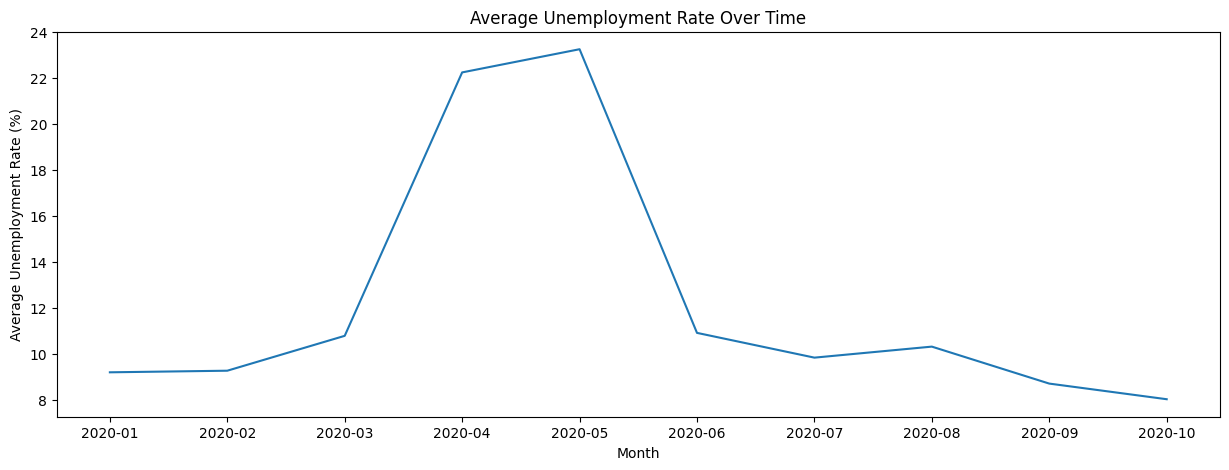

In [36]:
#ploting the unemployment rate month wise in the year for all states in India in aggregate 

unemp['Month'] = unemp['date'].dt.to_period('M')  # Extracting month and year

# Group by month and calculate average unemployment rate
monthly_avg_unemployment = unemp.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

# Convert Period objects to strings for plotting
monthly_avg_unemployment.index = monthly_avg_unemployment.index.astype(str)
plt.figure(figsize=(15, 5))
plt.plot(monthly_avg_unemployment.index, monthly_avg_unemployment.values)
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate Over Time')
plt.show()


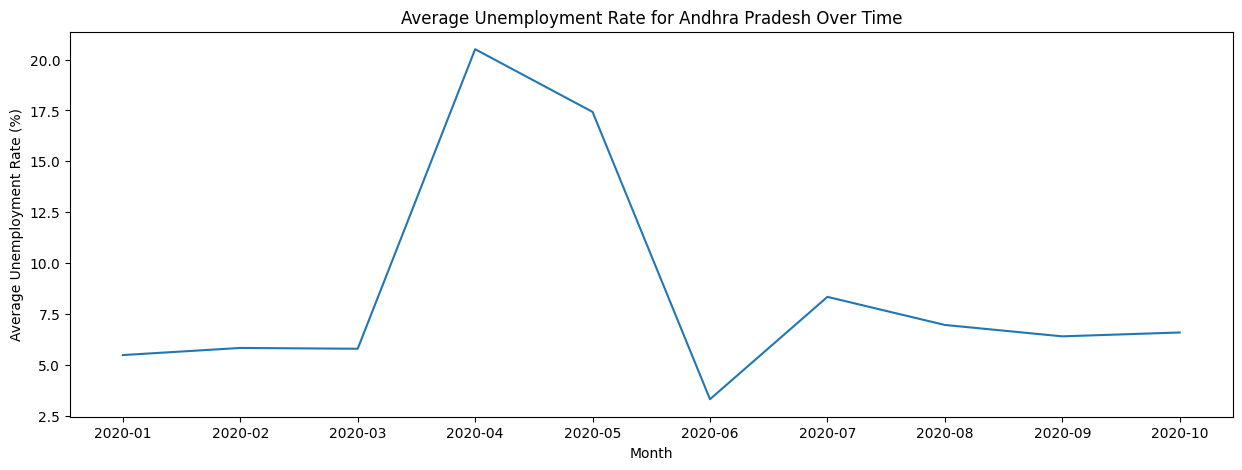

In [37]:
# Calculating  unemployment rate for each state(say: andhra pradesh) for the year 

unemp['Month'] = unemp['date'].dt.to_period('M')   

# Plotting data for Andhra Pradesh
state_to_plot = 'Andhra Pradesh'
state_data = unemp[unemp['Region'] == state_to_plot]

# Group by month and calculate average unemployment rate
monthly_avg_unemployment = state_data.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

# Convert Period objects to strings for plotting
monthly_avg_unemployment.index = monthly_avg_unemployment.index.astype(str)

plt.figure(figsize=(15, 5))
plt.plot(monthly_avg_unemployment.index, monthly_avg_unemployment.values)
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.title(f'Average Unemployment Rate for {state_to_plot} Over Time')
plt.show()


In [48]:
#Analysing the unemployment rate in India for both the years 2019 and 2020 for rural and urban areas

ue = pd.read_csv("C:\\Users\\hp\\Downloads\\Unemployment in India.csv")
print(ue)

             Region         date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   

C:\Users\hp\AppData\Local\Temp\ipykernel_4912\2801964838.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ue['date'] = pd.to_datetime(ue['date'])


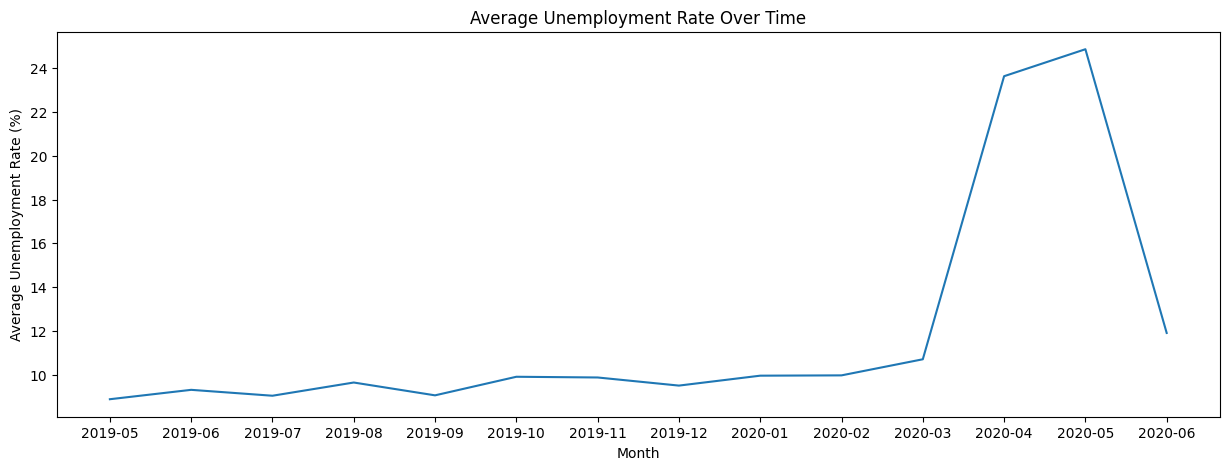

In [56]:
ue.columns = ue.columns.str.strip()
ue['date'] = pd.to_datetime(ue['date'])

#plotting the graph for years 2019 and 2020 in India for aggregation of rural and urban areas using groupby function

ue['Month'] = ue['date'].dt.to_period('M')  # Extracting month and year
# Filter data for the years 2019 and 2020
ue_2019_2020 = ue[(ue['date'].dt.year >= 2019) & (ue['date'].dt.year <= 2020)]

# Group by month and calculate average unemployment rate
monthly_avg_unemployment = ue_2019_2020.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

# Convert Period objects to strings for plotting
monthly_avg_unemployment.index = monthly_avg_unemployment.index.astype(str)


plt.figure(figsize=(15, 5))
plt.plot(monthly_avg_unemployment.index, monthly_avg_unemployment.values)
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate Over Time')
plt.show()


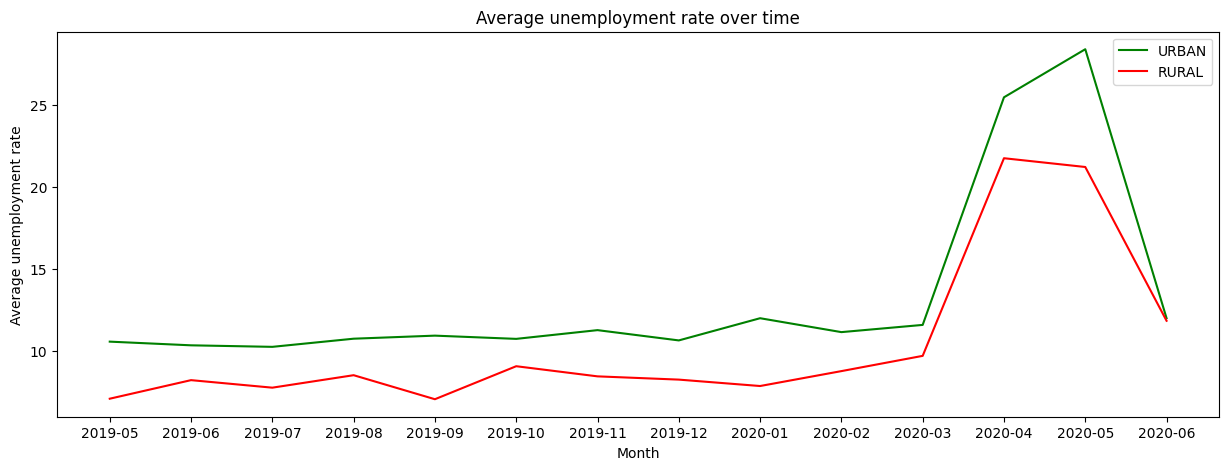

In [61]:
# Plotting and comparing the unemployment rates between Rural and Urban areas in India

ue['Month'] = ue['date'].dt.to_period('M')
# Filter data for the years 2019 and 2020
ue_2019_2020 = ue[(ue['date'].dt.year >= 2019) & (ue['date'].dt.year <= 2020)]

# Group by month and calculate average unemployment rate for urban and rural areas
monthly_avg_unemployment_urban = ue_2019_2020[ue_2019_2020['Area'] == 'Urban'].groupby('Month')['Estimated Unemployment Rate (%)'].mean()
monthly_avg_unemployment_rural = ue_2019_2020[ue_2019_2020['Area'] == 'Rural'].groupby('Month')['Estimated Unemployment Rate (%)'].mean()

# Convert Period objects to strings for plotting
monthly_avg_unemployment_urban.index = monthly_avg_unemployment_urban.index.astype(str)
monthly_avg_unemployment_rural.index = monthly_avg_unemployment_rural.index.astype(str)

plt.figure(figsize = (15,5))
#plot for urban areas
plt.plot(monthly_avg_unemployment_urban.index,monthly_avg_unemployment_urban.values,label = 'URBAN',color = 'green')
#plot for rural areas
plt.plot(monthly_avg_unemployment_rural.index,monthly_avg_unemployment_rural.values,label = 'RURAL',color = 'red')

plt.xlabel('Month')
plt.ylabel('Average unemployment rate')
plt.title('Average unemployment rate over time')
plt.legend()       # distingishes between the two curves 
plt.show()


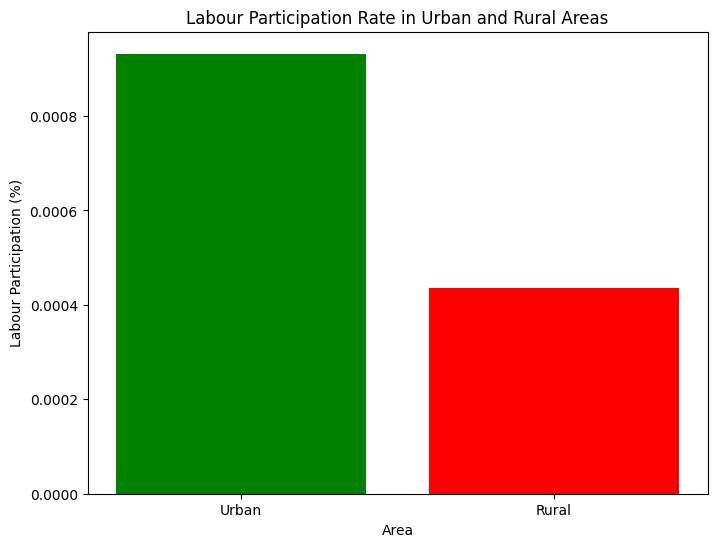

In [65]:
# Comparing the labour participation in the employment in rural and urban areas

# Calculate total employment for rural and urban areas
total_employment_urban = ue[ue['Area'] == 'Urban']['Estimated Employed'].sum()
total_employment_rural = ue[ue['Area'] == 'Rural']['Estimated Employed'].sum()

# Calculate total labor participation for rural and urban areas
total_labor_participation_urban = ue[ue['Area'] == 'Urban']['Estimated Labour Participation Rate (%)'].sum()
total_labor_participation_rural = ue[ue['Area'] == 'Rural']['Estimated Labour Participation Rate (%)'].sum()

# Calculate labor participation as a percentage of total employment
labor_participation_percentage_urban = (total_labor_participation_urban / total_employment_urban) * 100
labor_participation_percentage_rural = (total_labor_participation_rural / total_employment_rural) * 100
areas = ['Urban', 'Rural']
labour_participation_percentage = [labor_participation_percentage_urban, labor_participation_percentage_rural]

plt.figure(figsize=(8, 6))
plt.bar(areas, labour_participation_percentage, color=['green', 'red'])
plt.xlabel('Area')
plt.ylabel('Labour Participation (%)')
plt.title('Labour Participation Rate in Urban and Rural Areas')
plt.show()